In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
from pandas import read_csv
from sklearn.manifold import TSNE
import xgboost
from sklearn.model_selection import train_test_split
from pandas import DataFrame
from sklearn.metrics import accuracy_score
from joblib import dump, load

In [2]:
x = read_csv("fashion-mnist_train.csv")
x.shape

(60000, 785)

In [3]:
y = x['label']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [4]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), random_state=1)
clf.fit(X_train[0:1000], y_train[0:1000])

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [5]:
pred = clf.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, pred)))

accuracy: 0.6086111111111111


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
                    ("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(C=1, loss="hinge"))
                  ])
svm_clf.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [20]:
pred = svm_clf.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [29]:
print("accuracy: " + str(accuracy_score(pred,y_test)))

accuracy: 0.9353333333333333


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# poly_kernel_svm_clf = Pipeline ([("scaler", StandardScaler()),("svm_clf", SVC(kernel="poly",degree=3,coef0=1,C=5))])
# poly_kernel_svm_clf.fit(X_train,y_train)
poly_kernel_svm_clf = load('poly_kernel_svm_clf.joblib')

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [6]:
pred = poly_kernel_svm_clf.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [7]:
print("accuracy: " + str(accuracy_score(pred,y_test)))

accuracy: 0.9831111111111112


In [9]:
# from joblib import dump, load
# dump(poly_kernel_svm_clf, 'poly_kernel_svm_clf.joblib')

['poly_kernel_svm_clf.joblib']

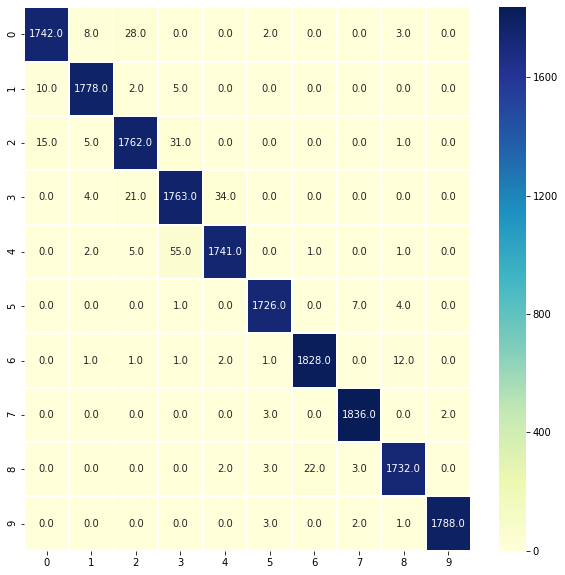

In [8]:
plt.figure(figsize=(10,10))
conf = confusion_matrix(y_test,pred)
# df = DataFrame(data=conf)
ax = sns.heatmap(conf,fmt=".1f",annot=True, linewidths=.9,cmap="YlGnBu")
#pour regler le probléme de thuncat == !pip install matplotlib==3.1.0